# Регресія на головні компоненти 
 ## Бєлюкіна Тетяна
 Варіант 1

Спочатку я використовую код із 1 лабораторної роботи для отримання вхідного датасету

In [53]:
filenames <- list.files(path="quantquote_daily_sp500_83986/daily", full.names=TRUE)

datalist = lapply(filenames,
    function(x){x0<-read.csv(file=x,header=F)[,c(1,6)];
    colnames(x0)<-c("data",
    unlist(strsplit(x,"[_.]"))[7]);
    x0})

y<-Reduce(function(x,y) {merge(x,y,by="data")}, datalist)   

In [54]:
Data<-y[-nrow(y),-1] #delete the last raw and first column
Data$tomorrow_adbe<-y$adbe[-1] #delete first value in adbe

Поділимо вхідний датасет на 2 різні частини - датасет для підгонки 1 моделі що містить всі дані і датасет для підгонки 2 моделі що містить останні 50 записів, що передують 20-ти тестовим

In [55]:
nn<-nrow(Data)
data_for1 = Data
data_for2 = Data[(nn-69):nn,]

Для аналізу головних компонент 1го датасету для підгонки моделі використовуємо фунцію 'princomp'

In [56]:
PC_1<-princomp(data_for1[,!names(data_for1) %in% c("tomorrow_adbe")],cor=T)
summary(PC_1)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.5973069 1.1290522 0.9555103 0.65827291 0.54953007
Proportion of Variance 0.6746003 0.1274759 0.0913000 0.04333232 0.03019833
Cumulative Proportion  0.6746003 0.8020762 0.8933762 0.93670854 0.96690687
                           Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.38673940 0.276392157 0.209684251 0.208705461
Proportion of Variance 0.01495674 0.007639262 0.004396749 0.004355797
Cumulative Proportion  0.98186361 0.989502871 0.993899620 0.998255417
                           Comp.10
Standard deviation     0.132082673
Proportion of Variance 0.001744583
Cumulative Proportion  1.000000000

Можемо помітити що перша компонента бере на себе - 67.5% всього розкиду, 2га компонента - 12.7%, 3а - 9.1%, а всі інші - значно менше, тому можемо розглядати проекцію на простір 2х або 3х компонент. <br />
Нарисуємо діаграму власних чисел: 

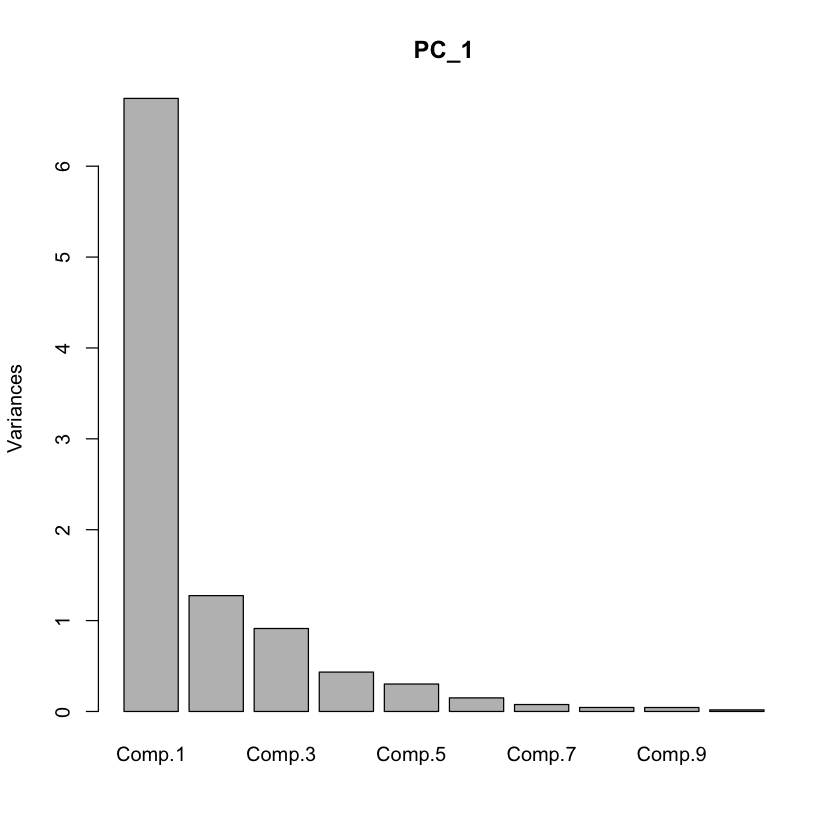

In [57]:
plot(PC_1)

Злам відбувається після першого власного числа  <br />
Виведемо навантаження на головні компоненти

In [58]:
loadings(PC_1)


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
a     0.161  0.725         0.588                0.117  0.240  0.151        
aa   -0.297  0.275 -0.492         0.461 -0.151 -0.360 -0.393  0.239 -0.121 
aapl -0.246  0.533        -0.707 -0.131         0.267  0.238               
abbv  0.369        -0.125 -0.179               -0.699  0.505 -0.143  0.212 
abc   0.376         0.145 -0.145                                    -0.897 
abt   0.334        -0.385 -0.158         0.806  0.156 -0.179               
ace   0.353                       0.635 -0.246  0.328 -0.111 -0.512  0.146 
acn   0.261 -0.153 -0.699        -0.277 -0.435  0.322  0.184               
act   0.340  0.291               -0.500 -0.200 -0.211 -0.628 -0.199  0.144 
adbe  0.358         0.270 -0.253  0.176 -0.166  0.116         0.759  0.287 

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    

Повторимо всі ті самі кроки для другого датасету, що містить тільки 50 записів

In [59]:
PC_2<-princomp(data_for2[,!names(data_for2) %in% c("tomorrow_adbe")],cor=T)
summary(PC_2)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     2.0146217 1.7773943 1.1056031 0.7943022 0.57809036
Proportion of Variance 0.4058701 0.3159131 0.1222358 0.0630916 0.03341885
Cumulative Proportion  0.4058701 0.7217831 0.8440190 0.9071106 0.94052941
                           Comp.6    Comp.7     Comp.8      Comp.9     Comp.10
Standard deviation     0.44937479 0.3864855 0.35674323 0.246248970 0.235569299
Proportion of Variance 0.02019377 0.0149371 0.01272657 0.006063856 0.005549289
Cumulative Proportion  0.96072318 0.9756603 0.98838686 0.994450711 1.000000000

Для цього датасету навантаженість розкиду на 2 та 3 компоненти значно більша, тут також буде доцільно використовувати 3 компоненти

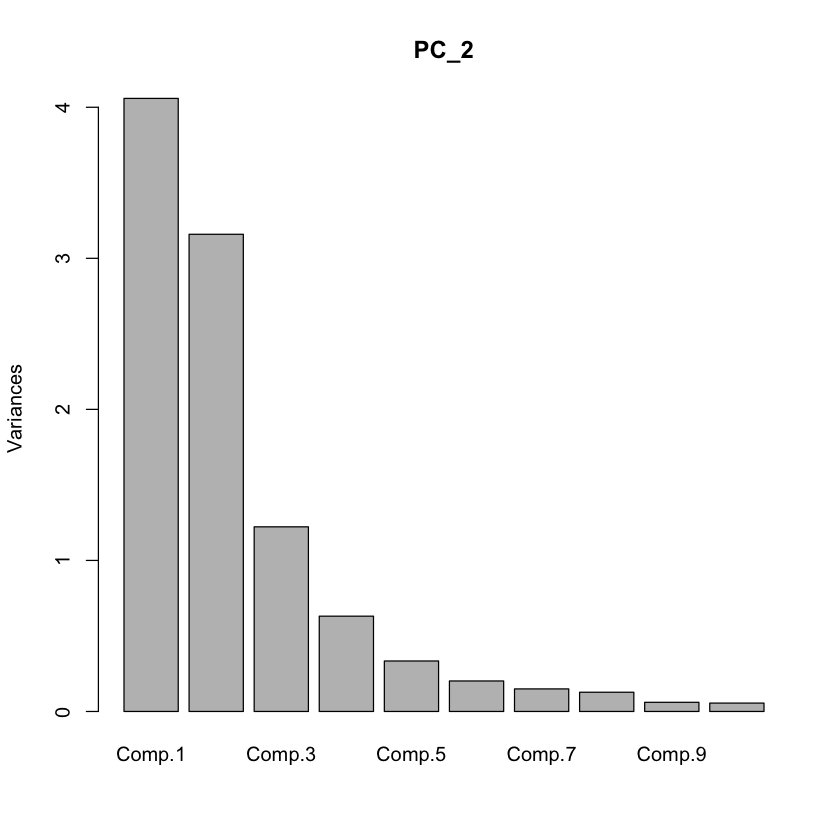

In [60]:
plot(PC_2)

Побудуємо лінійну регресію використовуючи 1ий аналіз головних компонент

In [61]:
pc1_data <- as.data.frame(PC_1$scores[,1:3])
pc1_data$tomorrow_adbe <- Data$tomorrow_adbe
PC1Model <- lm(tomorrow_adbe~Comp.1 + Comp.2 + Comp.3, data=pc1_data[1:(nn-20),])
summary(PC1Model)


Call:
lm(formula = tomorrow_adbe ~ Comp.1 + Comp.2 + Comp.3, data = pc1_data[1:(nn - 
    20), ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.99470 -0.64403 -0.01307  0.56217  3.12736 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.97134    0.09120 471.182  < 2e-16 ***
Comp.1       1.13841    0.03694  30.821  < 2e-16 ***
Comp.2      -0.24738    0.08604  -2.875  0.00473 ** 
Comp.3       0.84290    0.10510   8.020  5.8e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9336 on 128 degrees of freedom
Multiple R-squared:  0.9035,	Adjusted R-squared:  0.9013 
F-statistic: 399.6 on 3 and 128 DF,  p-value: < 2.2e-16


Запишемо ще явно у числовому вигляді коефіцієнти прогнозу у термінах початкових змінних

In [62]:
meanX <- apply(data_for1, 2, mean)
bPC <-loadings(PC_1)[,1:3]%*%coefficients(PC1Model)[-1]
b0 <- coefficients(PC1Model)[1]-meanX[-11]%*%bPC

In [63]:
bPC

a,0.03093421
aa,-0.82095189
aapl,-0.43503406
abbv,0.30353528
abc,0.54334328
abt,0.05718175
ace,0.43664360
acn,-0.25360205
act,0.38251049
adbe,0.64154460


In [64]:
b0

110.5755


Значення p-value дуже близьке до 0: 2.2e-16, Multiple R-squared:  0.9035, отже на перший погляд модель впоралась дуже добре, також можемо помітити що 3 компонента має вищий рівень значущості ніж 2, отже добре що ми її залишили для побудови моделі. <br/> 
Тепер аналогічно побудуємо модель для 2го аналізу головних компонентів

In [65]:
pc2_data <- as.data.frame(PC_2$scores[,1:3])
pc2_data$tomorrow_adbe <- data_for2$tomorrow_adbe
PC2Model <- lm(tomorrow_adbe~Comp.1 + Comp.2 + Comp.3, data=pc2_data[1:50,])
summary(PC2Model)


Call:
lm(formula = tomorrow_adbe ~ Comp.1 + Comp.2 + Comp.3, data = pc2_data[1:50, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.51939 -0.47270 -0.08171  0.45863  2.12379 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 45.39060    0.16166 280.779  < 2e-16 ***
Comp.1       0.70111    0.09981   7.025 8.37e-09 ***
Comp.2      -0.25722    0.06219  -4.136 0.000149 ***
Comp.3      -0.53168    0.08996  -5.910 3.95e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7865 on 46 degrees of freedom
Multiple R-squared:  0.7585,	Adjusted R-squared:  0.7427 
F-statistic: 48.16 on 3 and 46 DF,  p-value: 3.095e-14


Аналогічно запишемо коефіцієнти моделі у явному вигляді для початкових даних

In [66]:
meanX <- apply(data_for2, 2, mean)
bPC_2 <-loadings(PC_2)[,1:3]%*%coefficients(PC2Model)[-1]
b0_2 <- coefficients(PC2Model)[1]-meanX[-11]%*%bPC_2

In [67]:
bPC_2

a,-0.09666727
aa,-0.13843848
aapl,-0.01453881
abbv,0.02519824
abc,0.33117490
abt,-0.34642062
ace,0.37072687
acn,-0.41174257
act,-0.16057719
adbe,0.49860607


In [68]:
b0_2

46.09457


Ця модель впоралась теж добре, але деякі показники стали гірше. <br/>
Варто тепер перевірити яка модель впорається краще на тестових даних

In [69]:
U1 <- pc1_data$tomorrow_adbe[(nn-19):nn]-predict(PC1Model, pc1_data[(nn-19):nn,])
U2 <- pc2_data$tomorrow_adbe[51:70]-predict(PC2Model, pc2_data[51:70,])

Побудуємо графік відхилень прогнозів від реальних даних

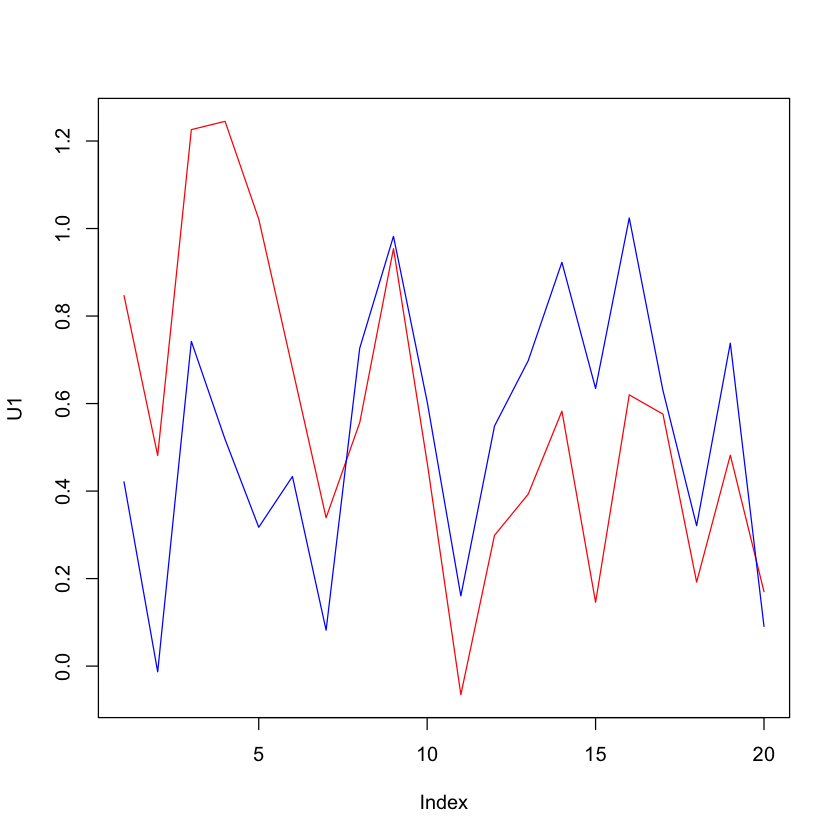

In [70]:
plot(U1,type="l",col="red",ylim=c(min(U1,U2),max(U1,U2)))
lines(U2,col="blue")

Наче 2 модель впоралась краще, але трохи важко оцінити тут на око, тому використаємо також MAE для підрахунку похибки

In [71]:
library(Metrics)
cat('MAE:\n PC_1: ',mae(pc1_data$tomorrow_adbe[(nn-19):nn], predict(PC1Model,pc1_data[(nn-19):nn,])),
    '\n PC_2: ',mae(pc2_data$tomorrow_adbe[51:70],predict(PC2Model, pc2_data[51:70,])))

MAE:
 PC_1:  0.5670395 
 PC_2:  0.5304112

Дійсно, не дивлячись на те що на даних для тренування 1 модель видала кращий результат, на даних для тестування різниці між моделями майже нема

# Висновок
1. Перша думка коли 1ша модель дала кращі результати на тренуванні ніж 2га: "Нічого дивного, чим більше історичних точок, тим краще", але кращий результат на тестовій частині для 2ої моделі теж можна пояснити - скоріш за все саме останні дані мають сильний вплив через схожість обставин. Дуже старі дані можуть вже не описувати реалії сучасного світу. <br/> <br/>
2. Якщо порівнювати сьогоднішні результати з результатами 1 Лабораторної роботи, то перші дають неймовірно добрий результат (0.5304112 проти 0.6441675), не дивлячись на те, що кількість регресорів теж 3, але використвуючи аналіз головних компонент ми тепер не втрачаємо важливі дані при відкиданні регресорів.
